# Poonam Jagtap | LGMVIP | Data Science

# Task: Prediction using Decision Tree Algorithm

# Level: Intermediate Level

## Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## Importing Data

In [12]:
info= pd.read_csv("C:/Users\Poonam\Desktop\PythonProjects\Iris.csv")

In [13]:
info

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## checking datatypes

In [14]:
info.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Information regarding data

In [15]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## shape of datasets

In [17]:
info.shape

(150, 6)

Describe function gives the basic numerical info about data for each numeric feature.

In [18]:
info.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
info.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [20]:
info.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Plotting

<AxesSubplot:xlabel='count', ylabel='Species'>

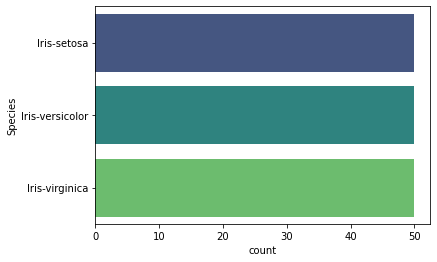

In [21]:
sns.countplot(y = 'Species', data = info, palette = "viridis" )

## Data Visualisation

<AxesSubplot:>

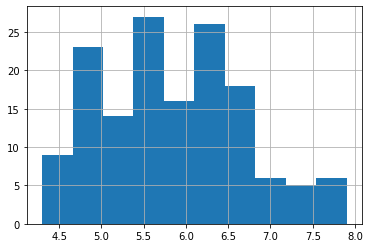

In [22]:
info['SepalLengthCm'].hist()

<AxesSubplot:>

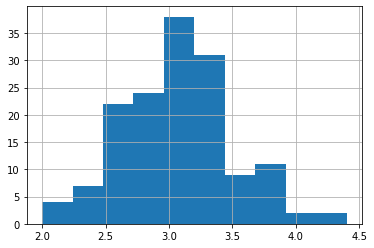

In [23]:
info['SepalWidthCm'].hist()

<AxesSubplot:>

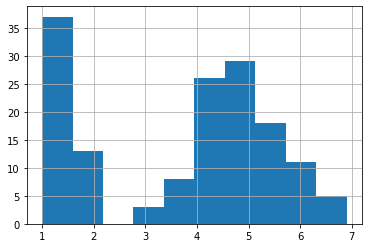

In [24]:
info['PetalLengthCm'].hist()

<AxesSubplot:>

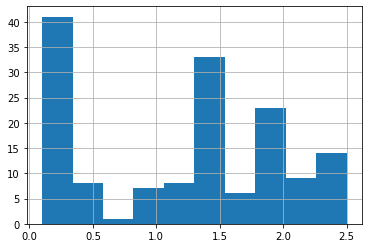

In [25]:
info['PetalWidthCm'].hist()

In [26]:
colors = ['blue', 'red', 'pink']
Species = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

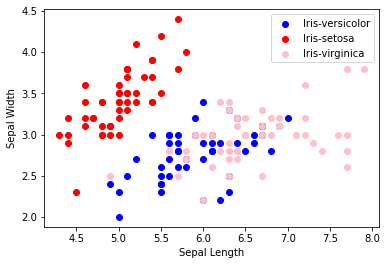

In [29]:
for i in range(3):
    x = info[info['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

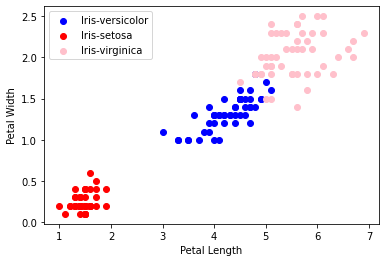

In [32]:
for i in range(3):
    x = info[info['Species'] == Species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

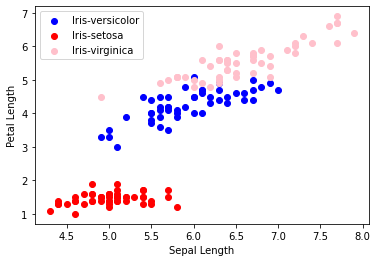

In [33]:
for i in range(3):
    x = info[info['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

## Pair Plot

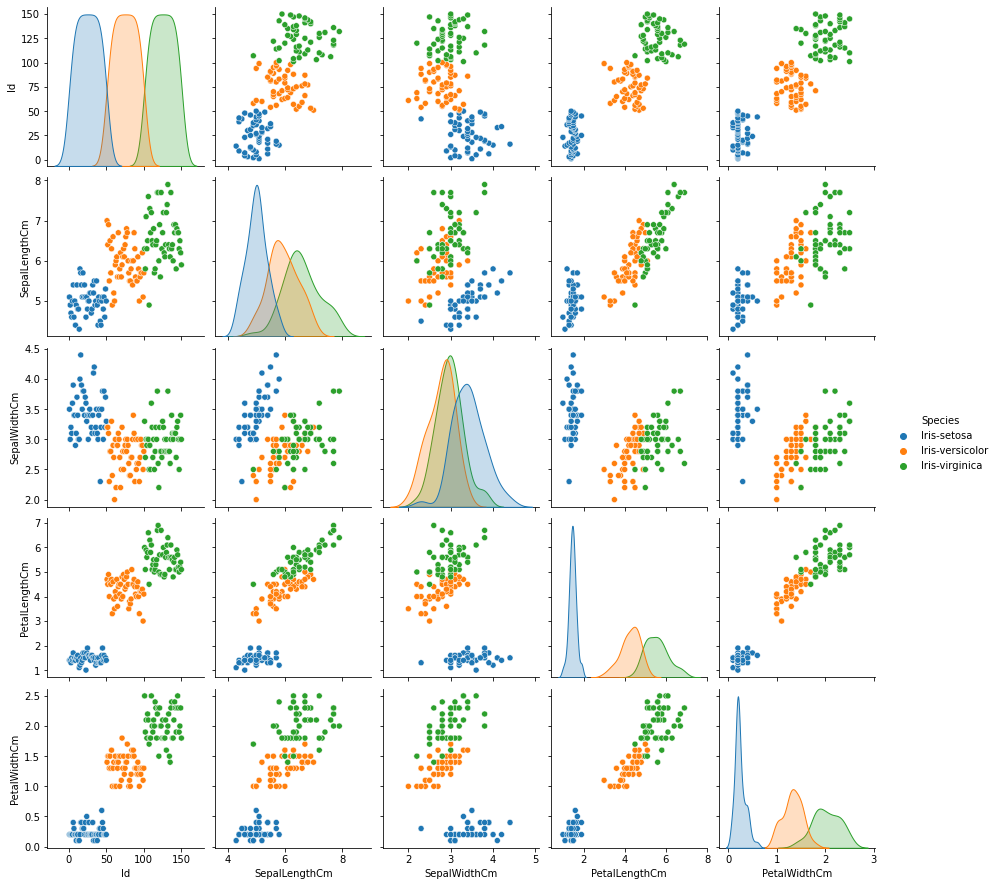

In [34]:
sns.pairplot(data=info, hue='Species')
plt.show()

## Checking correlation between attributes

In [35]:
info.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

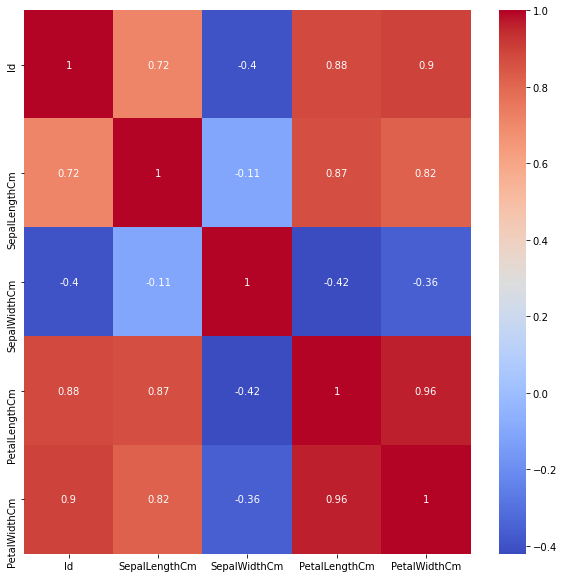

In [36]:
corr = info.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

## Preprocessing the Data

In [37]:
x = info.iloc[:, :-1].values
y = info.iloc[:, :-1].values

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
info['Encoded Species']=le.fit_transform(info['Species'])

In [39]:
info.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [40]:
info.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


## Splitting the dataset

In [41]:
from sklearn.model_selection import train_test_split
X = info.drop(columns=['Species'])
Y = info['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Creating Decision tree 

In [86]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(prediction, y_test))

Accuracy: 1.0


## Classification Report

In [87]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## Confusion Matrix

In [88]:
print(confusion_matrix(y_test,prediction))

[[16  0  0]
 [ 0 16  0]
 [ 0  0 13]]


## Decision Tree

[Text(535.6800000000001, 453.0, 'X[0] <= 100.5\ngini = 0.666\nsamples = 105\nvalue = [34, 34, 37]'),
 Text(357.12, 271.8, 'X[5] <= 0.5\ngini = 0.5\nsamples = 68\nvalue = [34, 34, 0]'),
 Text(178.56, 90.59999999999997, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(535.6800000000001, 90.59999999999997, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(714.24, 271.8, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

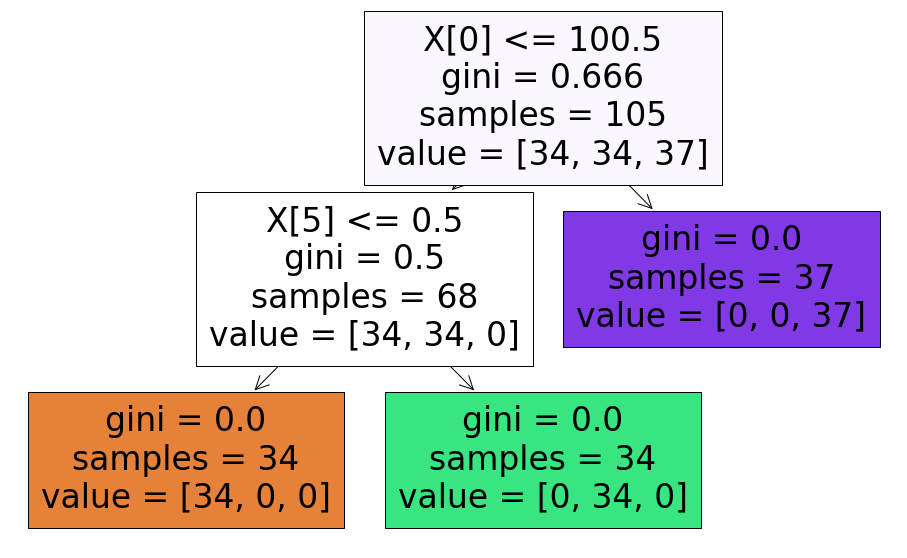

In [89]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(clf,filled=True)